#### 导入工具包

In [37]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 读取数据集

In [2]:
calendar = pd.read_csv('../data/calendar.csv.gz')

#### 预览前5行数据集

In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,$75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,$69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,$59.00,$59.00,3.0,1125.0


In [5]:
calendar.shape

(7166780, 7)

In [6]:
calendar.date.min(), calendar.date.max()

('2020-03-13', '2021-03-13')

#### 数据集中为空的数据总数

In [7]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             185
adjusted_price    185
minimum_nights      3
maximum_nights      3
dtype: int64

#### 1、价格为空的数据

In [8]:
calendar[calendar.price.isnull()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
784350,4470364,2020-09-17,f,NaN,NaN,1.0,60.0
784351,4470364,2020-09-18,f,NaN,NaN,1.0,60.0
784352,4470364,2020-09-19,f,NaN,NaN,1.0,60.0
784353,4470364,2020-09-20,f,NaN,NaN,1.0,60.0
784354,4470364,2020-09-21,f,NaN,NaN,1.0,60.0
...,...,...,...,...,...,...,...
1726787,9542122,2021-03-09,f,NaN,NaN,5.0,8.0
1726788,9542122,2021-03-10,f,NaN,NaN,5.0,8.0
1726789,9542122,2021-03-11,f,NaN,NaN,5.0,8.0
1726790,9542122,2021-03-12,f,NaN,NaN,5.0,8.0


#### 2、处理数据集

##### 2.1、删除空值

In [42]:
calendar_pure = calendar.dropna()

In [43]:
calendar_pure.shape

(7166592, 7)

##### 2.2 转换时间格式

In [44]:
calendar_pure['date'] = pd.to_datetime(calendar_pure['date'])

In [45]:
calendar_pure

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,$75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,$69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,$59.00,$59.00,3.0,1125.0
...,...,...,...,...,...,...,...
7166775,42617021,2021-03-09,f,$179.00,$179.00,1.0,1125.0
7166776,42617021,2021-03-10,f,$179.00,$179.00,1.0,1125.0
7166777,42617021,2021-03-11,f,$179.00,$179.00,1.0,1125.0
7166778,42617021,2021-03-12,f,$179.00,$179.00,1.0,1125.0


In [46]:
calendar_pure.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

##### 2.3、将price数据转换为float类型

In [47]:
calendar_pure['price'] = calendar_pure['price'].str.replace('$', '')

In [48]:
calendar_pure['price'] = calendar_pure['price'].str.replace(',', '')

In [49]:
calendar_pure

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,75.00,$75.00,2.0,80.0
1,2818,2020-03-14,f,69.00,$69.00,3.0,1125.0
2,2818,2020-03-15,t,69.00,$69.00,3.0,1125.0
3,2818,2020-03-16,t,59.00,$59.00,3.0,1125.0
4,2818,2020-03-17,t,59.00,$59.00,3.0,1125.0
...,...,...,...,...,...,...,...
7166775,42617021,2021-03-09,f,179.00,$179.00,1.0,1125.0
7166776,42617021,2021-03-10,f,179.00,$179.00,1.0,1125.0
7166777,42617021,2021-03-11,f,179.00,$179.00,1.0,1125.0
7166778,42617021,2021-03-12,f,179.00,$179.00,1.0,1125.0


In [50]:
calendar_pure['price'] = calendar_pure['price'].astype(float)

In [51]:
calendar_pure.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

#### 提取时间中你需要的数据

##### 2.4 按月份进行分组

In [53]:
data = calendar_pure.groupby(calendar_pure['date'].dt.strftime('%B'))

##### 2.5、价格求均值

In [54]:
price_mean = data['price'].mean()

##### 2.6、可视化

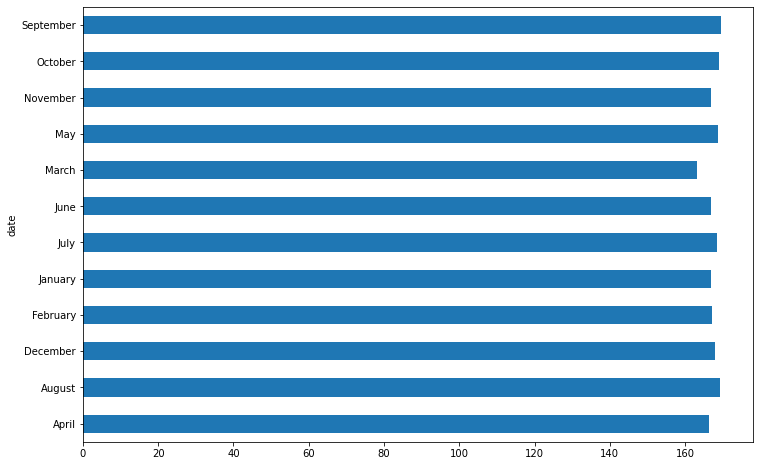

In [59]:
price_mean.plot(kind='barh', figsize=(12, 8))